# Project: Tesla car sales dataset analysis

<a id='intro'></a>
## Introduction

> The dataset is about cars sales by Tesla Automive comapany between 2016 to 2017. This dataset contains the period of car sales, model, gross profit, country of sales and many more.
>
> This analysis will showcase the relationship between the dependant variables and the independant varaible.


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
#importing all the liberies we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Here, we load the dataset using pandas. We check the dataset size,info and for null values in the dataset.

### General Properties

In [2]:
#using pandas to read the csv file
tesla = pd.read_excel('tesla-sales-data.xlsx')

In [3]:
#view first 5 row of the dataset
tesla.head()

,Unnamed: 0,Model,Period,Country,Purchase type,Version,Price,Gross Profit
0,NaN,Model S,201601,US,Deposit,75D AWD,75700,22407.268985
1,NaN,Model S,201601,US,Cash purchase,75D AWD,75700,22407.268985
2,NaN,Model S,201601,US,Cash purchase,75 RWD,70700,20927.264428
3,NaN,Model S,201601,US,Cash purchase,75 RWD,70700,20927.264428
4,NaN,Model S,201601,US,Cash purchase,75 RWD,70700,20927.264428


In [4]:
tesla.shape

(85592, 8)

In [5]:
#checking for null values in each coumns with the data types
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85592 entries, 0 to 85591
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     0 non-null      float64
 1   Model          85592 non-null  object 
 2   Period         85592 non-null  int64  
 3   Country        85592 non-null  object 
 4   Purchase type  85592 non-null  object 
 5   Version        85592 non-null  object 
 6   Price          85592 non-null  int64  
 7   Gross Profit   85592 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 5.2+ MB


In [6]:
tesla.describe()

,Unnamed: 0,Period,Price,Gross Profit
count,0.0,85592.000000,85592.000000,85592.000000
mean,NaN,201655.958734,75253.148659,21945.504208
std,NaN,50.068457,4199.494954,10328.412329
min,NaN,201601.000000,70700.000000,7178.567774
25%,NaN,201606.000000,74000.000000,13305.311576
50%,NaN,201612.000000,74000.000000,21083.195661
75%,NaN,201706.000000,75700.000000,25497.234748
max,NaN,201712.000000,88700.000000,54371.510702


> the .describe() gives us the first analysis breakdown of our data. we can get the count,mean, max and so on with it.

## Data Wrangling
>Here, we split column period to year and month. 
>
>Renaming some columns.
>
>Deleting columns not useful for this project

In [7]:
#splitting the period column to year and month
split_Year, split_Month = [],[]
for i, row in tesla.iterrows():
    split_Year.append(int(int(tesla['Period'][i])/100))
    split_Month.append(round(tesla['Period'][i]-split_Year[i]*100, 5))
tesla.insert(0,'Year',split_Year, True)
tesla['Month'] = split_Month

In [8]:
#chechking if our splitting worked
tesla.head()

,Year,Unnamed: 0,Model,Period,Country,Purchase type,Version,Price,Gross Profit,Month
0,2016,NaN,Model S,201601,US,Deposit,75D AWD,75700,22407.268985,1
1,2016,NaN,Model S,201601,US,Cash purchase,75D AWD,75700,22407.268985,1
2,2016,NaN,Model S,201601,US,Cash purchase,75 RWD,70700,20927.264428,1
3,2016,NaN,Model S,201601,US,Cash purchase,75 RWD,70700,20927.264428,1
4,2016,NaN,Model S,201601,US,Cash purchase,75 RWD,70700,20927.264428,1


In [9]:
#renaming columns
tesla.rename(columns = {'Purchase type':'Purchase_type','Gross Profit':'Gross_Profit'}, inplace = True)

In [10]:
tesla.head()

,Year,Unnamed: 0,Model,Period,Country,Purchase_type,Version,Price,Gross_Profit,Month
0,2016,NaN,Model S,201601,US,Deposit,75D AWD,75700,22407.268985,1
1,2016,NaN,Model S,201601,US,Cash purchase,75D AWD,75700,22407.268985,1
2,2016,NaN,Model S,201601,US,Cash purchase,75 RWD,70700,20927.264428,1
3,2016,NaN,Model S,201601,US,Cash purchase,75 RWD,70700,20927.264428,1
4,2016,NaN,Model S,201601,US,Cash purchase,75 RWD,70700,20927.264428,1


In [11]:
#deleting columns not useful
tesla.drop(["Unnamed: 0", "Period"], axis=1, inplace=True)
tesla.head()

,Year,Model,Country,Purchase_type,Version,Price,Gross_Profit,Month
0,2016,Model S,US,Deposit,75D AWD,75700,22407.268985,1
1,2016,Model S,US,Cash purchase,75D AWD,75700,22407.268985,1
2,2016,Model S,US,Cash purchase,75 RWD,70700,20927.264428,1
3,2016,Model S,US,Cash purchase,75 RWD,70700,20927.264428,1
4,2016,Model S,US,Cash purchase,75 RWD,70700,20927.264428,1


In [12]:
tesla.shape

(85592, 8)

<a id='eda'></a>
## Exploratory Data Analysis

> Check the value count for some independent variables.
>
>Compare some dependant varaibles with the independant varaible.


In [13]:
#number of unique car model 
tesla['Model'].nunique()

2

In [14]:
tesla['Model'].unique()

array(['Model S', 'Model X'], dtype=object)

In [15]:
#number of unique countries 
tesla['Country'].nunique()

3

In [16]:
tesla['Country'].unique()

array(['US', 'Germany', 'Australia'], dtype=object)

In [17]:
#number method of payment
tesla['Purchase_type'].nunique()

2

In [18]:
tesla['Purchase_type'].unique()

array(['Deposit', 'Cash purchase'], dtype=object)

In [19]:
#number of model version sold 
tesla['Version'].nunique()

6

In [20]:
tesla['Version'].unique()

array(['75D AWD', '75 RWD', '90D AWD', '60D AWD', '90D', 'P90D'],
      dtype=object)

In [21]:
#number of model sold 
tesla.Model.value_counts()

Model X    46967
Model S    38625
Name: Model, dtype: int64

In [22]:
#most year with most cars sold
tesla.Year.value_counts()

2016    43250
2017    42342
Name: Year, dtype: int64

In [23]:
#country with the highest cars sold
tesla.Country.value_counts()

US           63469
Germany      16956
Australia     5167
Name: Country, dtype: int64

In [24]:
#most common method of payment
tesla["Purchase_type"].value_counts()

Deposit          45976
Cash purchase    39616
Name: Purchase_type, dtype: int64

In [25]:
#most version of cars sold
tesla.Version.value_counts()

P90D       33655
75 RWD     16492
90D        13312
60D AWD     9032
75D AWD     8660
90D AWD     4441
Name: Version, dtype: int64

In [26]:
#most model and version of cars sold
tesla[["Model", "Version"]].value_counts()

Model    Version
Model X  P90D       33655
Model S  75 RWD     16492
Model X  90D        13312
Model S  60D AWD     9032
         75D AWD     8660
         90D AWD     4441
dtype: int64

In [27]:
#most model sold by country
tesla[["Model", "Country"]].value_counts()

Model    Country  
Model X  US           34791
Model S  US           28678
Model X  Germany       9436
Model S  Germany       7520
Model X  Australia     2740
Model S  Australia     2427
dtype: int64

In [28]:
#which year most model was sold?
tesla[["Model", "Year"]].value_counts()

Model    Year
Model X  2016    23902
         2017    23065
Model S  2016    19348
         2017    19277
dtype: int64

In [29]:
#best payment method by each contries
tesla[["Purchase_type", "Country"]].value_counts()

Purchase_type  Country  
Deposit        US           34681
Cash purchase  US           28788
Deposit        Germany       8604
Cash purchase  Germany       8352
Deposit        Australia     2691
Cash purchase  Australia     2476
dtype: int64

In [30]:
tesla.groupby('Model').apply(lambda x: x['Gross_Profit'].value_counts().idxmax())

Model
Model S    22273.719954
Model X    21904.067435
dtype: float64

In [31]:
#year with the most sales
tesla.groupby('Year').sum().Gross_Profit

Year
2016    9.494136e+08
2017    9.289460e+08
Name: Gross_Profit, dtype: float64

In [32]:
#country with the most sales
tesla.groupby('Country').sum().Gross_Profit

Country
Australia    8.035623e+07
Germany      2.742770e+08
US           1.523726e+09
Name: Gross_Profit, dtype: float64

In [33]:
#which model had most profit?
tesla.groupby('Model').sum().Gross_Profit

Model
Model S    8.387993e+08
Model X    1.039560e+09
Name: Gross_Profit, dtype: float64

In [34]:
#most sales made using which method of payment?
tesla.groupby('Purchase_type').sum().Gross_Profit

Purchase_type
Cash purchase    8.625173e+08
Deposit          1.015842e+09
Name: Gross_Profit, dtype: float64

In [35]:
#minimum unit price of model
tesla.groupby('Model').min().Gross_Profit

Model
Model S    7197.969308
Model X    7178.567774
Name: Gross_Profit, dtype: float64

In [36]:
#maximum unit price of model
tesla.groupby('Model').max().Gross_Profit

Model
Model S    54371.510702
Model X    49038.566586
Name: Gross_Profit, dtype: float64

Text(0.5, 1.0, 'Tesla Model sold')

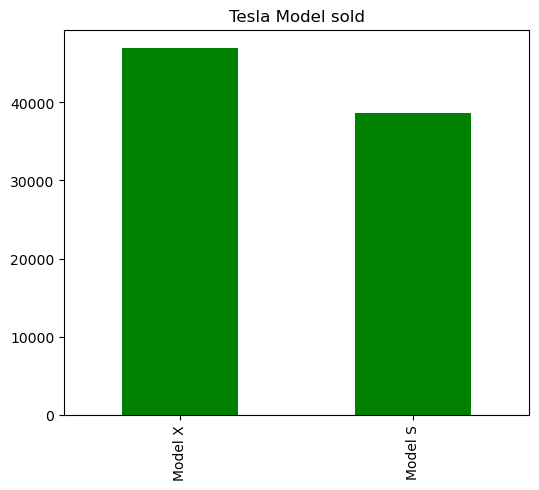

In [37]:
#visualization on most model sold
tesla['Model'].value_counts().plot(kind='bar', color='green',figsize=(6,5)) 
plt.title('Tesla Model sold')

Text(0.5, 1.0, 'Country most tesla was sold')

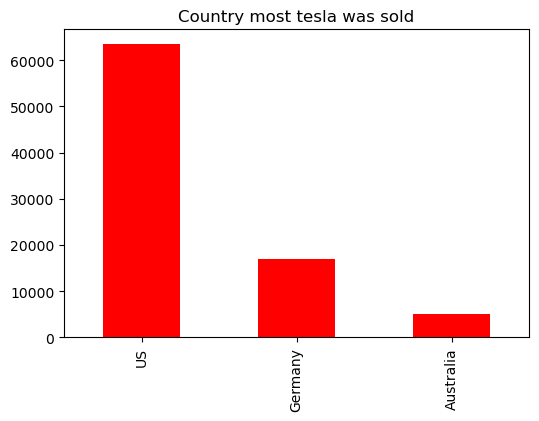

In [38]:
#graphical representaion of most cars sold by country
tesla['Country'].value_counts().plot(kind='bar', color='red', figsize=(6,4))
plt.title('Country most tesla was sold')

Text(0.5, 1.0, 'Method of payment')

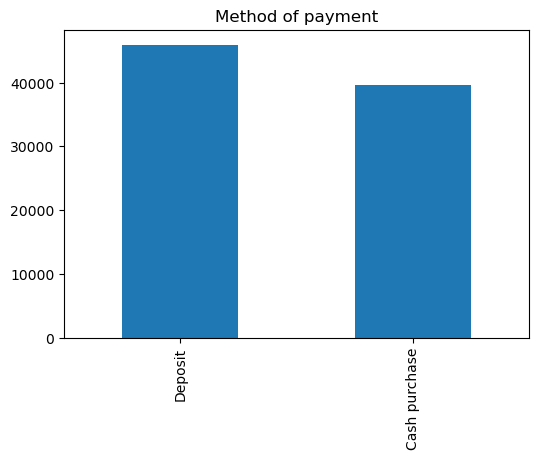

In [39]:
#visuals of most method of payment used
tesla['Purchase_type'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title('Method of payment')

Text(0.5, 1.0, 'Purchase type by Gross profit')

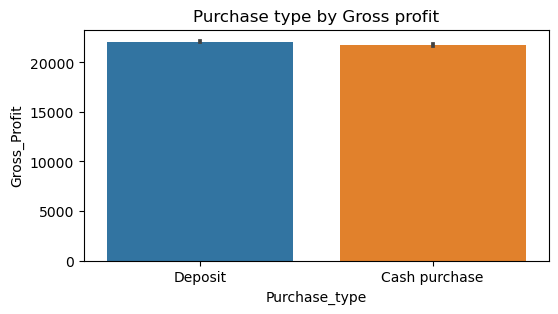

In [40]:
#visuals of Purchase type by Gross profit
plt.figure(figsize=(6,3))
sns.barplot(x='Purchase_type',y='Gross_Profit',data=tesla)
plt.title("Purchase type by Gross profit")

Text(0.5, 1.0, 'Gross Profit by Country')

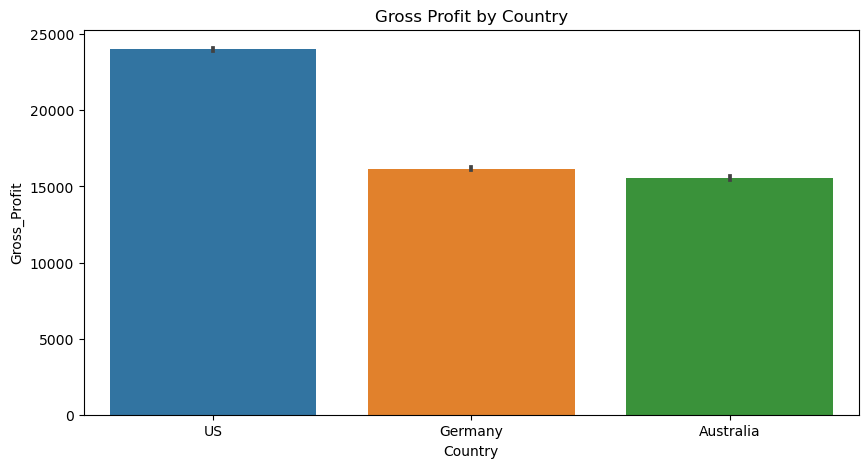

In [41]:
#countries with the most sales
plt.figure(figsize=(10,5))
sns.barplot(x='Country',y='Gross_Profit',data=tesla)
plt.title("Gross Profit by Country")

Text(0.5, 1.0, 'Country most profit made, Divided by Purchase type')

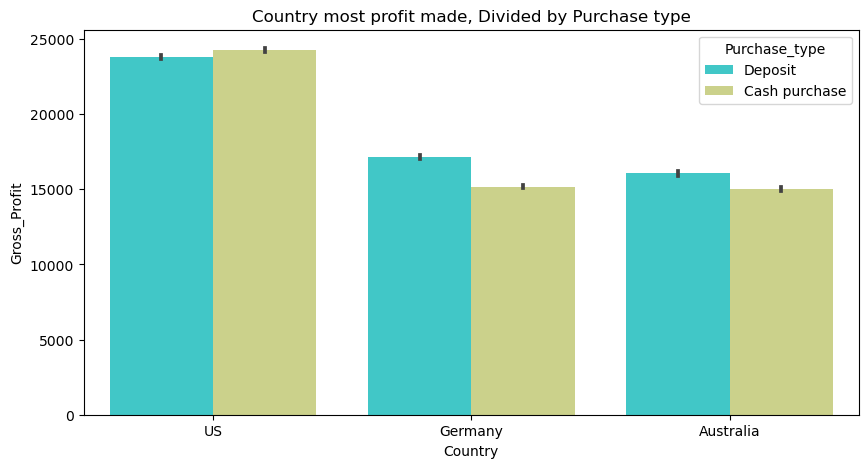

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(x='Country',y='Gross_Profit',data=tesla, palette='rainbow', hue='Purchase_type')
plt.title("Country most profit made, Divided by Purchase type")

Text(0.5, 1.0, 'Distribution of Age by Passenger Class')

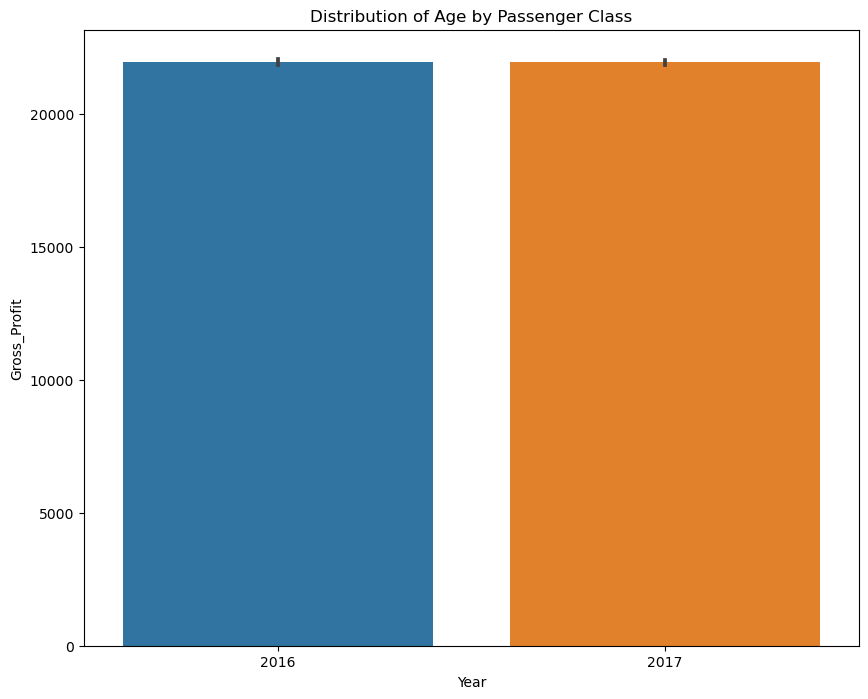

In [43]:
plt.figure(figsize=(10,8))
sns.barplot(x='Year', y='Gross_Profit', data=tesla)
plt.title("Distribution of Age by Passenger Class")

Text(0.5, 1.0, 'Distribution of Age by Passenger Class')

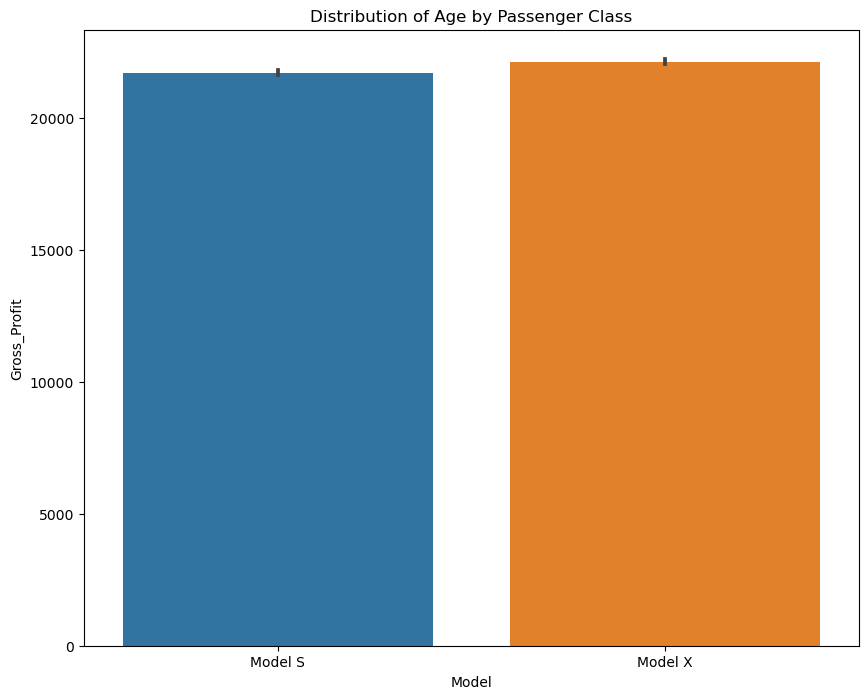

In [44]:
plt.figure(figsize=(10,8))
sns.barplot(x='Model', y='Gross_Profit', data=tesla)
plt.title("Distribution of Age by Passenger Class")

<a id='conclusions'></a>
## Conclusions

#### The findings of the analysis is listed below
>
>More Model X was sold than Model S
>
>908 units of cars was sold more in 2016
>
>US sold more units of tesla cars 
>
>Customers prefer to deposit than cash purchase 
>
>Model X version P90D was sold more than any model version
>
>Most sales was during 2016
>
>Model X generated more profit
>
>US made more profit compared to other countries